### Análise Comparativa
#### Limpeza e tratamento de dados:
A primeira etapa é entender, de fato, a lógica de negócio do conjunto. Em seguida, precisamos fazer uma breve limpeza, imputando valores faltantes e nos livrando de pequenas lacunas sem muito impacto.

Na nossa análise anterior, descobrimos, também, que o dataset possui algumas várias linhas duplicadas. Vamos nos livrar delas também.

In [1]:
# Importa o Pandas para a leitura do dicionário
import pandas as pd

In [2]:
show_dict = pd.read_csv('../data/external/dicionario.csv', index_col = 0)

show_dict

variavel                                       descrição  \
0                   age                                           Idade   
1                   sex                                            Sexo   
2       chest pain type                            Tipo de dor no peito   
3          resting bp s                     Pressão arterial em repouso   
4           cholesterol                                      Colesterol   
5   fasting blood sugar            Açúcar no sangue em jejum > 120mg/dl   
6           resting ecg                    Eletrocardiograma em repouso   
7        max heart rate                      Frequência cardíaca máxima   
8       exercise angina                   Angina induzida por exercício   
9               oldpeak                        Depressão do segmento ST   
10             ST slope  Inclinação do Segmento ST no Pico do Exercício   
11               target                                            Alvo   

            tipo   subtipo  
0   Quantitativa  Discreta  
1    Qualitativa   Nominal  
2    Qualitativa   Ordinal  
3   Quantitativa  Contínua  
4   Quantitativa  Contínua  
5    Qualitativa   Nominal  
6    Qualitativa   Nominal  
7   Quantitativa  Contínua  
8    Qualitativa   Nominal  
9   Quantitativa  Contínua  
10   Qualitativa   Ordinal  
11   Qualitativa   Nominal

Formado por 12 atributos (um deles é o atributo-alvo, que identifica cardiopatas), o nosso dataset, como explicado anteriormente, revolve em torno de identificar fatores de risco para cardiopatias e predizer, à partir da interpretação desses fatores, as chances de um indivíduo não-cardiopata de desenvolver cardiopatias.

In [3]:
# Leitura do conjunto de dados
df = pd.read_csv("../data/raw/doencas_cardiacas.csv")

df.shape

(1190, 12)

O conjunto de dados conta com 1190 instâncias. Dessas instâncias, vamos identificar quantas:
- Possuem dados faltantes, para os imputar;
- São linhas duplicadas, para as remover;
- Possuem dados inconsistentes, para os corrigir.

In [4]:
# Identificando dados faltantes:
df.isna().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Não foram encontrados dados faltantes no conjunto de dados.

In [5]:
# Identificando linhas duplicadas:
dupes = df[df.duplicated()]

print(f'Foram encontradas {dupes.shape} linhas duplicadas.')

Foram encontradas (272, 12) linhas duplicadas.


In [6]:
# Removendo linhas duplicadas:
df = df.drop_duplicates().reset_index(drop = True)

df.shape

(918, 12)

Foram removidas 272 instâncias duplicadas do dataframe, resultando em 918 instâncias trabalháveis não-duplicadas e não-vazias. Agora precisamos identificar outliers:

In [7]:
# Importa bibliotecas de visualização de dados
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Estabelece cores e estilo de gráfico
# scatter color
sc = '#ECAE7F'
# line color
lc = '#822F70'
# cmap de bivalência
b_pal = sns.diverging_palette(9, 313, s=49, as_cmap=True)

# Estilo das grids
sns.set_style('whitegrid')

Para identificar melhor estes outliers, faremos uma breve descrição dos dados e visualizaremos um pairplot:

In [9]:
df.describe()

age         sex  chest pain type  resting bp s  cholesterol  \
count  918.000000  918.000000       918.000000    918.000000   918.000000   
mean    53.510893    0.789760         3.251634    132.396514   198.799564   
std      9.432617    0.407701         0.931031     18.514154   109.384145   
min     28.000000    0.000000         1.000000      0.000000     0.000000   
25%     47.000000    1.000000         3.000000    120.000000   173.250000   
50%     54.000000    1.000000         4.000000    130.000000   223.000000   
75%     60.000000    1.000000         4.000000    140.000000   267.000000   
max     77.000000    1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count           918.000000   918.000000      918.000000       918.000000   
mean              0.233115     0.603486      136.809368         0.404139   
std               0.423046     0.805968       25.460334         0.490992   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      120.000000         0.000000   
50%               0.000000     0.000000      138.000000         0.000000   
75%               0.000000     1.000000      156.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

          oldpeak    ST slope      target  
count  918.000000  918.000000  918.000000  
mean     0.887364    1.636166    0.553377  
std      1.066570    0.609341    0.497414  
min     -2.600000    0.000000    0.000000  
25%      0.000000    1.000000    0.000000  
50%      0.600000    2.000000    1.000000  
75%      1.500000    2.000000    1.000000  
max      6.200000    3.000000    1.000000

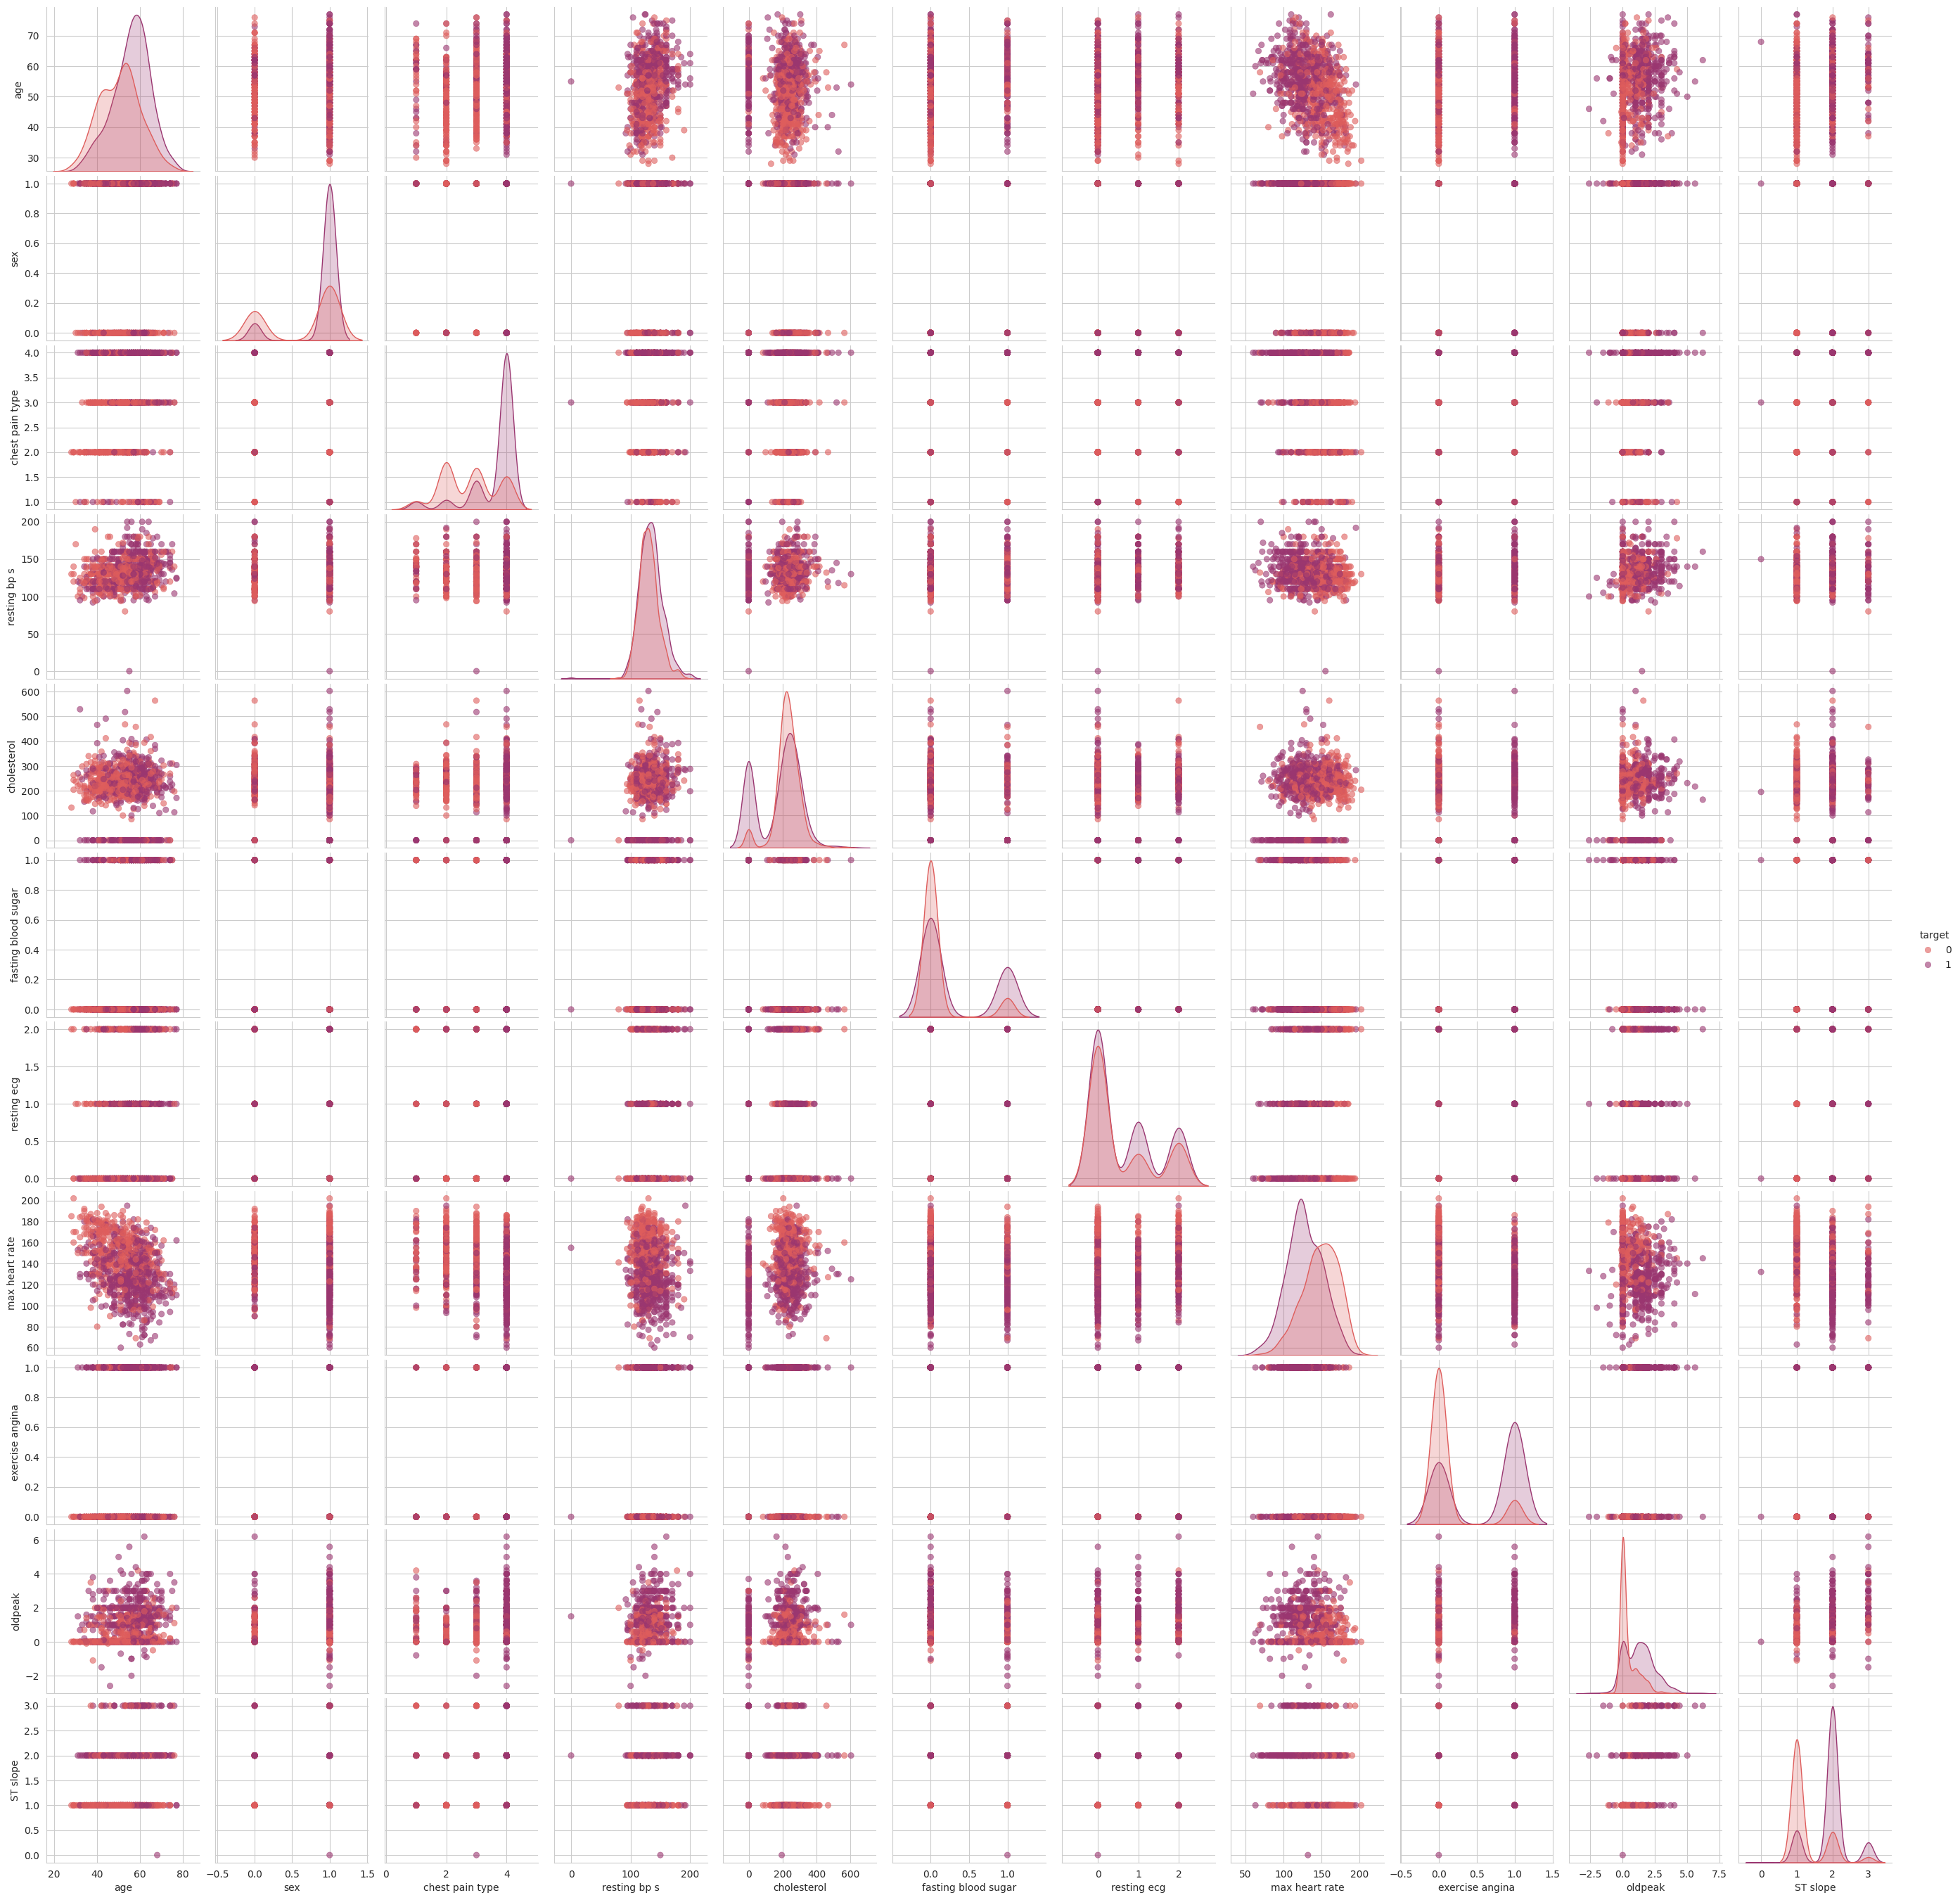

In [10]:
# Cria um pairplot para facilitar a visualização de outliers
sns.pairplot(df, diag_kind = 'kde',
             hue = 'target', palette = 'flare',
             plot_kws = dict(edgecolor = None, alpha = 0.6))

plt.show()             

O pairplot deste conjunto é curioso: a visualização fica um tanto confusa, em primeira instância, mas, com determinada atenção, pode-se perceber alguns fenômenos:
- Um outlier em *resting bp s* é responsável por um enviesamento da variável. Vamos removê-lo;
- Um outlier em *ST slope* aparenta causar um problema similar. A variável só aceita três valores (0, 1 e 2), mas um quarto (3) está presente.
- Existem vários outliers no *cholesterol* em zero, causando mais um viés problemático na variável. Vamos imputar valores novos pelo alto volume de valores errôneos neste caso;
- A variável *oldpeak* não pode possuir valores negativos. Normalmente, substituiría-lo-mos pela média, mas, dessa vez, especificamente, a abordagem será diferente.
- A variável *fasting blood sugar* parece ter um enorme volume de valores em zero, o que não necessariamente significa dados incorretos, mas pode indicar irrelevância pro modelo.

Vamos começar pelo primeiro ponto: a identificação e remoção do outlier em *resting bp s*:

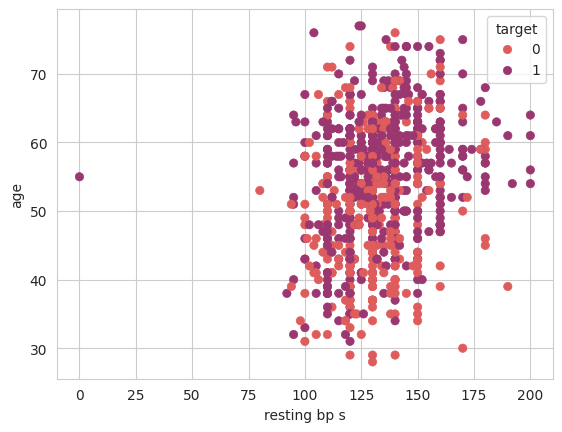

In [11]:
sns.scatterplot(df, x = 'resting bp s', y = 'age',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

Como pode ser melhor observado acima, existe pelo menos uma instância com pressão arterial zerada. Vamos descobrir quantas e, depois, removê-las:

In [12]:
# Seleciona todas as instâncias com menos de 75 em resting blood pressure e às isola em um dataframe novo.
rbps_out = df[(df['resting bp s'] < 75)]

# Exibe quantas instâncias nosso novo dataframe de outliers possui.
rbps_out.shape

(1, 12)

In [13]:
# Remove os mesmos índices no nosso dataframe de outliers do dataframe original
n_df = df.drop(rbps_out.index)

print(f'Novo tamanho do dataframe: {n_df.shape} (anterior: {df.shape}).')

Novo tamanho do dataframe: (917, 12) (anterior: (918, 12)).


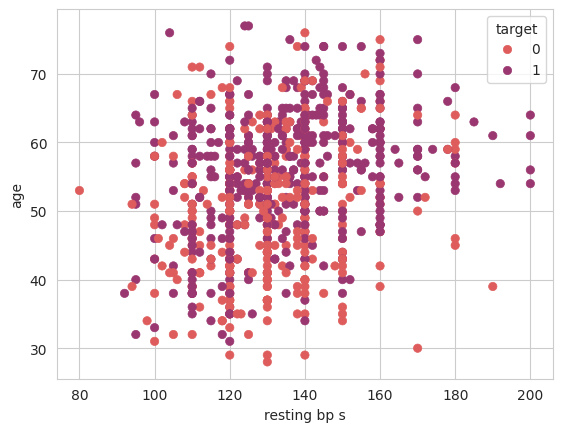

In [14]:
# Exibe uma nova visualização com o resting bp s limpo
sns.scatterplot(n_df, x = 'resting bp s', y = 'age',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

O caso de ST Slope é um tanto mais complexo: a variável, que deveria possuir apenas três valores (0, 1 e 2), possui também um terceiro valor:

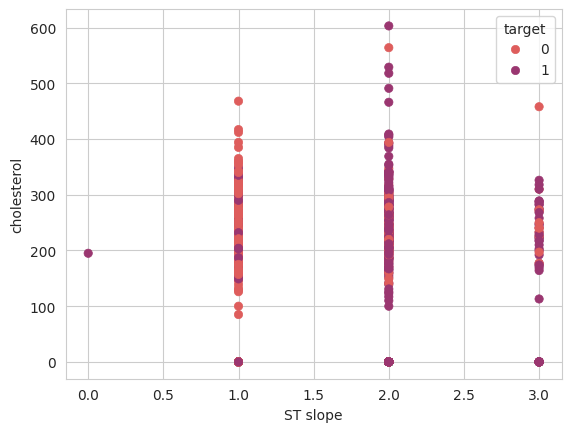

In [15]:
# Exibe uma visualização de ST slope
sns.scatterplot(n_df, x = 'ST slope', y = 'cholesterol',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

A nível de curiosidade, vamos contar quantos valores estão em cada grupo:

In [16]:
n_df['ST slope'].value_counts()

ST slope
2    458
1    395
3     63
0      1
Name: count, dtype: int64

É seguro dizer que a instância com o valor 0 é a instância errada criando um conflito na variável; além de ser uma única instância e um outlier. Vamos resolver o problema removendo essa instância do conjunto e remapeando os valores da variável de forma que ela volte ao seu estado original (0, 1 e 2):

In [17]:
# Tudo que não for zero em ST slope é retido. O valor zero é removido.
n_df = n_df[n_df['ST slope'] != 0]

# Remapeia os valores da variável de forma a retorná-la ao seu estado original:
n_df['ST slope'] = n_df['ST slope'].map({3: 2, 2: 1, 1: 0})

# Verifica novamente os valores de ST slope
n_df['ST slope'].value_counts()

ST slope
1    458
0    395
2     63
Name: count, dtype: int64

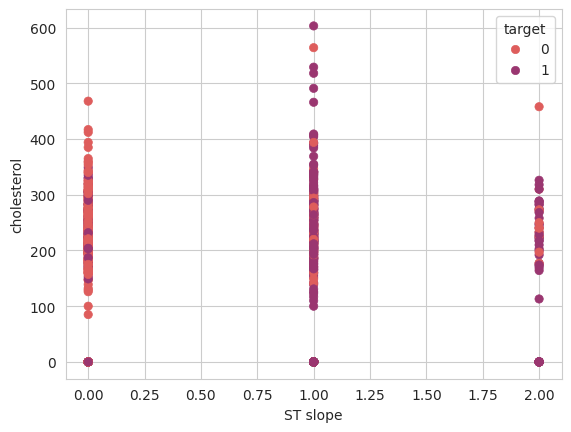

In [18]:
# Exibe uma nova visualização de ST slope
sns.scatterplot(n_df, x = 'ST slope', y = 'cholesterol',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

Com essas duas variáveis resolvidas, vamos agora para a mais problemática: *cholesterol*. Vamos visualizá-la mais à fundo para compreender, melhor, a situação:

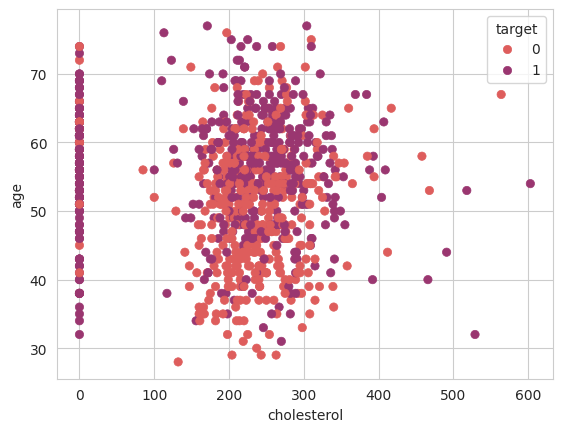

In [19]:
# Exibe uma visualização de cholesterol por idade
sns.scatterplot(n_df, x = 'cholesterol', y = 'age',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

É visível que a variável possui um problema severo com outliers - um grande volume dos dados está com colesterol zerado, o que é uma impossibilidade médica. Vamos identificar quantas instâncias em *cholesterol* se encontram, atualmente, zeradas:

In [20]:
# Filtra todo e qualquer valor de colesterol que corresponda a zero:
chol_out = n_df[(n_df['cholesterol'] == 0)]

# Exibe quantos valores de colesterol estão zerados:
chol_out.shape

(171, 12)

Com 171 instâncias com o colesterol zerado, a problemática fica mais séria: como já discutido antes na análise exploratória, a melhor solução para este caso é a imputação de novos valores. Existem algumas possibilidades de abordagem para essa solução, dentre as quais estão:

- Substituição por valores estatísticos (média, mediana ou moda)
- Substituição baseada em agrupamentos
- Substituição por valores aleatórios em um intervalo controlado
- Modelagem de valores ausentes por algorítmos de imputação

Embora a modelagem e a substituição por valores aleatórios sejam abordagens que respeitam a variação natural dos dados, vamos optar por utilizar a substituição baseada em agrupamentos. Para isso, aplicaremos a mediana de colesterol dentre grupos de idade:

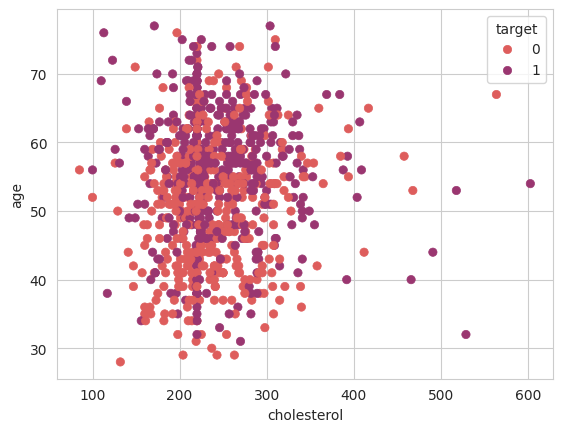

In [21]:
# Cria-se bins para os grupos de idade, de forma a não isolar nenhuma instância:
n_df['age_groups'] = pd.cut(
    n_df['age'],
    bins = range(0, 91, 15), # Intervalos de 15 em 15 anos, até 90
    right = False)

# Substitui os valores zerados de colesterol por medianas baseadas nos grupos de idade
n_df['cholesterol'] = n_df.groupby('age_groups', observed = False)['cholesterol'].transform(
    lambda x: x.replace(0, x.median())
)

# Remove a coluna de grupos de idade após o uso
n_df = n_df.drop(columns=['age_groups'])

# Exibe um novo plot com os valores imputados:
sns.scatterplot(n_df, x = 'cholesterol', y = 'age',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

Por fim, o problema com a variável *oldpeak*. Essa variável não deveria comportar valores negativos - o que significa que alguns desses valores estão inconsistentes:

In [22]:
# Identifica quantos valores da variável oldpeak são inferiores à zero:
olpk_out = n_df[(n_df['oldpeak'] < 0)]

# Visualiza quantas variáveis em "oldpeak" são negativas:
olpk_out.shape

(13, 12)

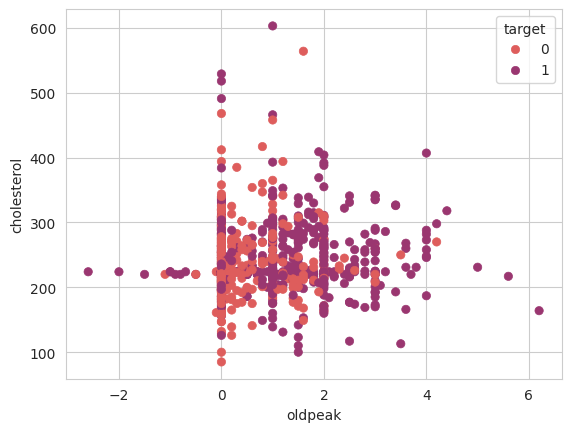

In [23]:
# Exibe uma visualização de oldpeak por cholesterol
sns.scatterplot(n_df, x = 'oldpeak', y = 'cholesterol',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

A solução, neste caso, poderia ser simples: substituiríamos quaisquer valores abaixo de zero pela média. Mas, dado o número de valores negativos, é possível deduzir que estes valores são os valores corretos (apenas negativos). Portanto, vamos convertê-los para valores positivos:

In [24]:
# Substitui valores negativos por valores positivos:
n_df['oldpeak'] = df['oldpeak'].apply(
    lambda x: abs(x) if x < 0
    else x)

# Verifica se ainda existem valores negativos em oldpeak
olpk_out = n_df[(n_df['oldpeak'] < 0)]

# Visualiza quantas variáveis em "oldpeak" ainda são negativas:
olpk_out.shape

(0, 12)

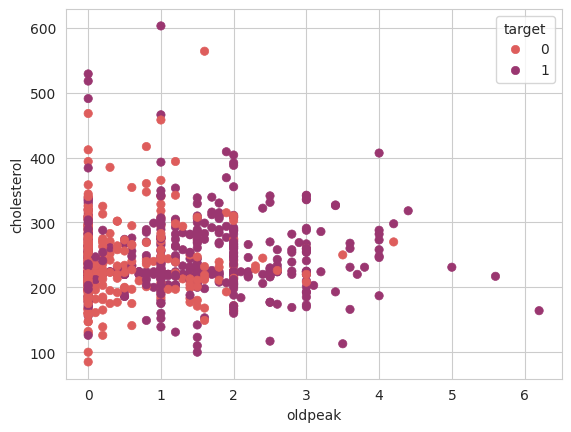

In [25]:
# Exibe uma nova visualização de oldpeak por cholesterol
sns.scatterplot(n_df, x = 'oldpeak', y = 'cholesterol',
                hue = 'target', palette = 'flare',
                edgecolor = None)

plt.show()

Por fim, vamos analisar a variável *fasting blood sugar*, a fim de entender se ela, de fato, é majoritariamente irrelevante para o treinamento o modelo:

In [26]:
# Verifica o número de valores 0 na variável fbs:
n_df['fasting blood sugar'].value_counts(normalize = True).mul(100).round(2)


fasting blood sugar
0    76.75
1    23.25
Name: proportion, dtype: float64

Aproximadamente 77% dos valores de *fasting blood sugar* são 0; ou seja, mais de 77% dos pacientes no conjunto não estavam com valores consideráveis de glicemia em jejum. A variável é, portanto, irrelevante para o nosso modelo; podemos removê-la para melhorar o processo de treinamento:

In [27]:
# Remove a variável "fasting blood sugar"
m_df = n_df.drop(columns=['fasting blood sugar'])

m_df

age  sex  chest pain type  resting bp s  cholesterol  resting ecg  \
0     40    1                2           140          289            0   
1     49    0                3           160          180            0   
2     37    1                2           130          283            1   
3     48    0                4           138          214            0   
4     54    1                3           150          195            0   
..   ...  ...              ...           ...          ...          ...   
913   45    1                1           110          264            0   
914   68    1                4           144          193            0   
915   57    1                4           130          131            0   
916   57    0                2           130          236            2   
917   38    1                3           138          175            0   

     max heart rate  exercise angina  oldpeak  ST slope  target  
0               172                0      0.0         0       0  
1               156                0      1.0         1       1  
2                98                0      0.0         0       0  
3               108                1      1.5         1       1  
4               122                0      0.0         0       0  
..              ...              ...      ...       ...     ...  
913             132                0      1.2         1       1  
914             141                0      3.4         1       1  
915             115                1      1.2         1       1  
916             174                0      0.0         1       1  
917             173                0      0.0         0       0  

[916 rows x 11 columns]

Agora que realizamos uma breve limpeza dos dados, podemos fazer mais uma visualização por pairplot utilizando nosso dataframe modificado:

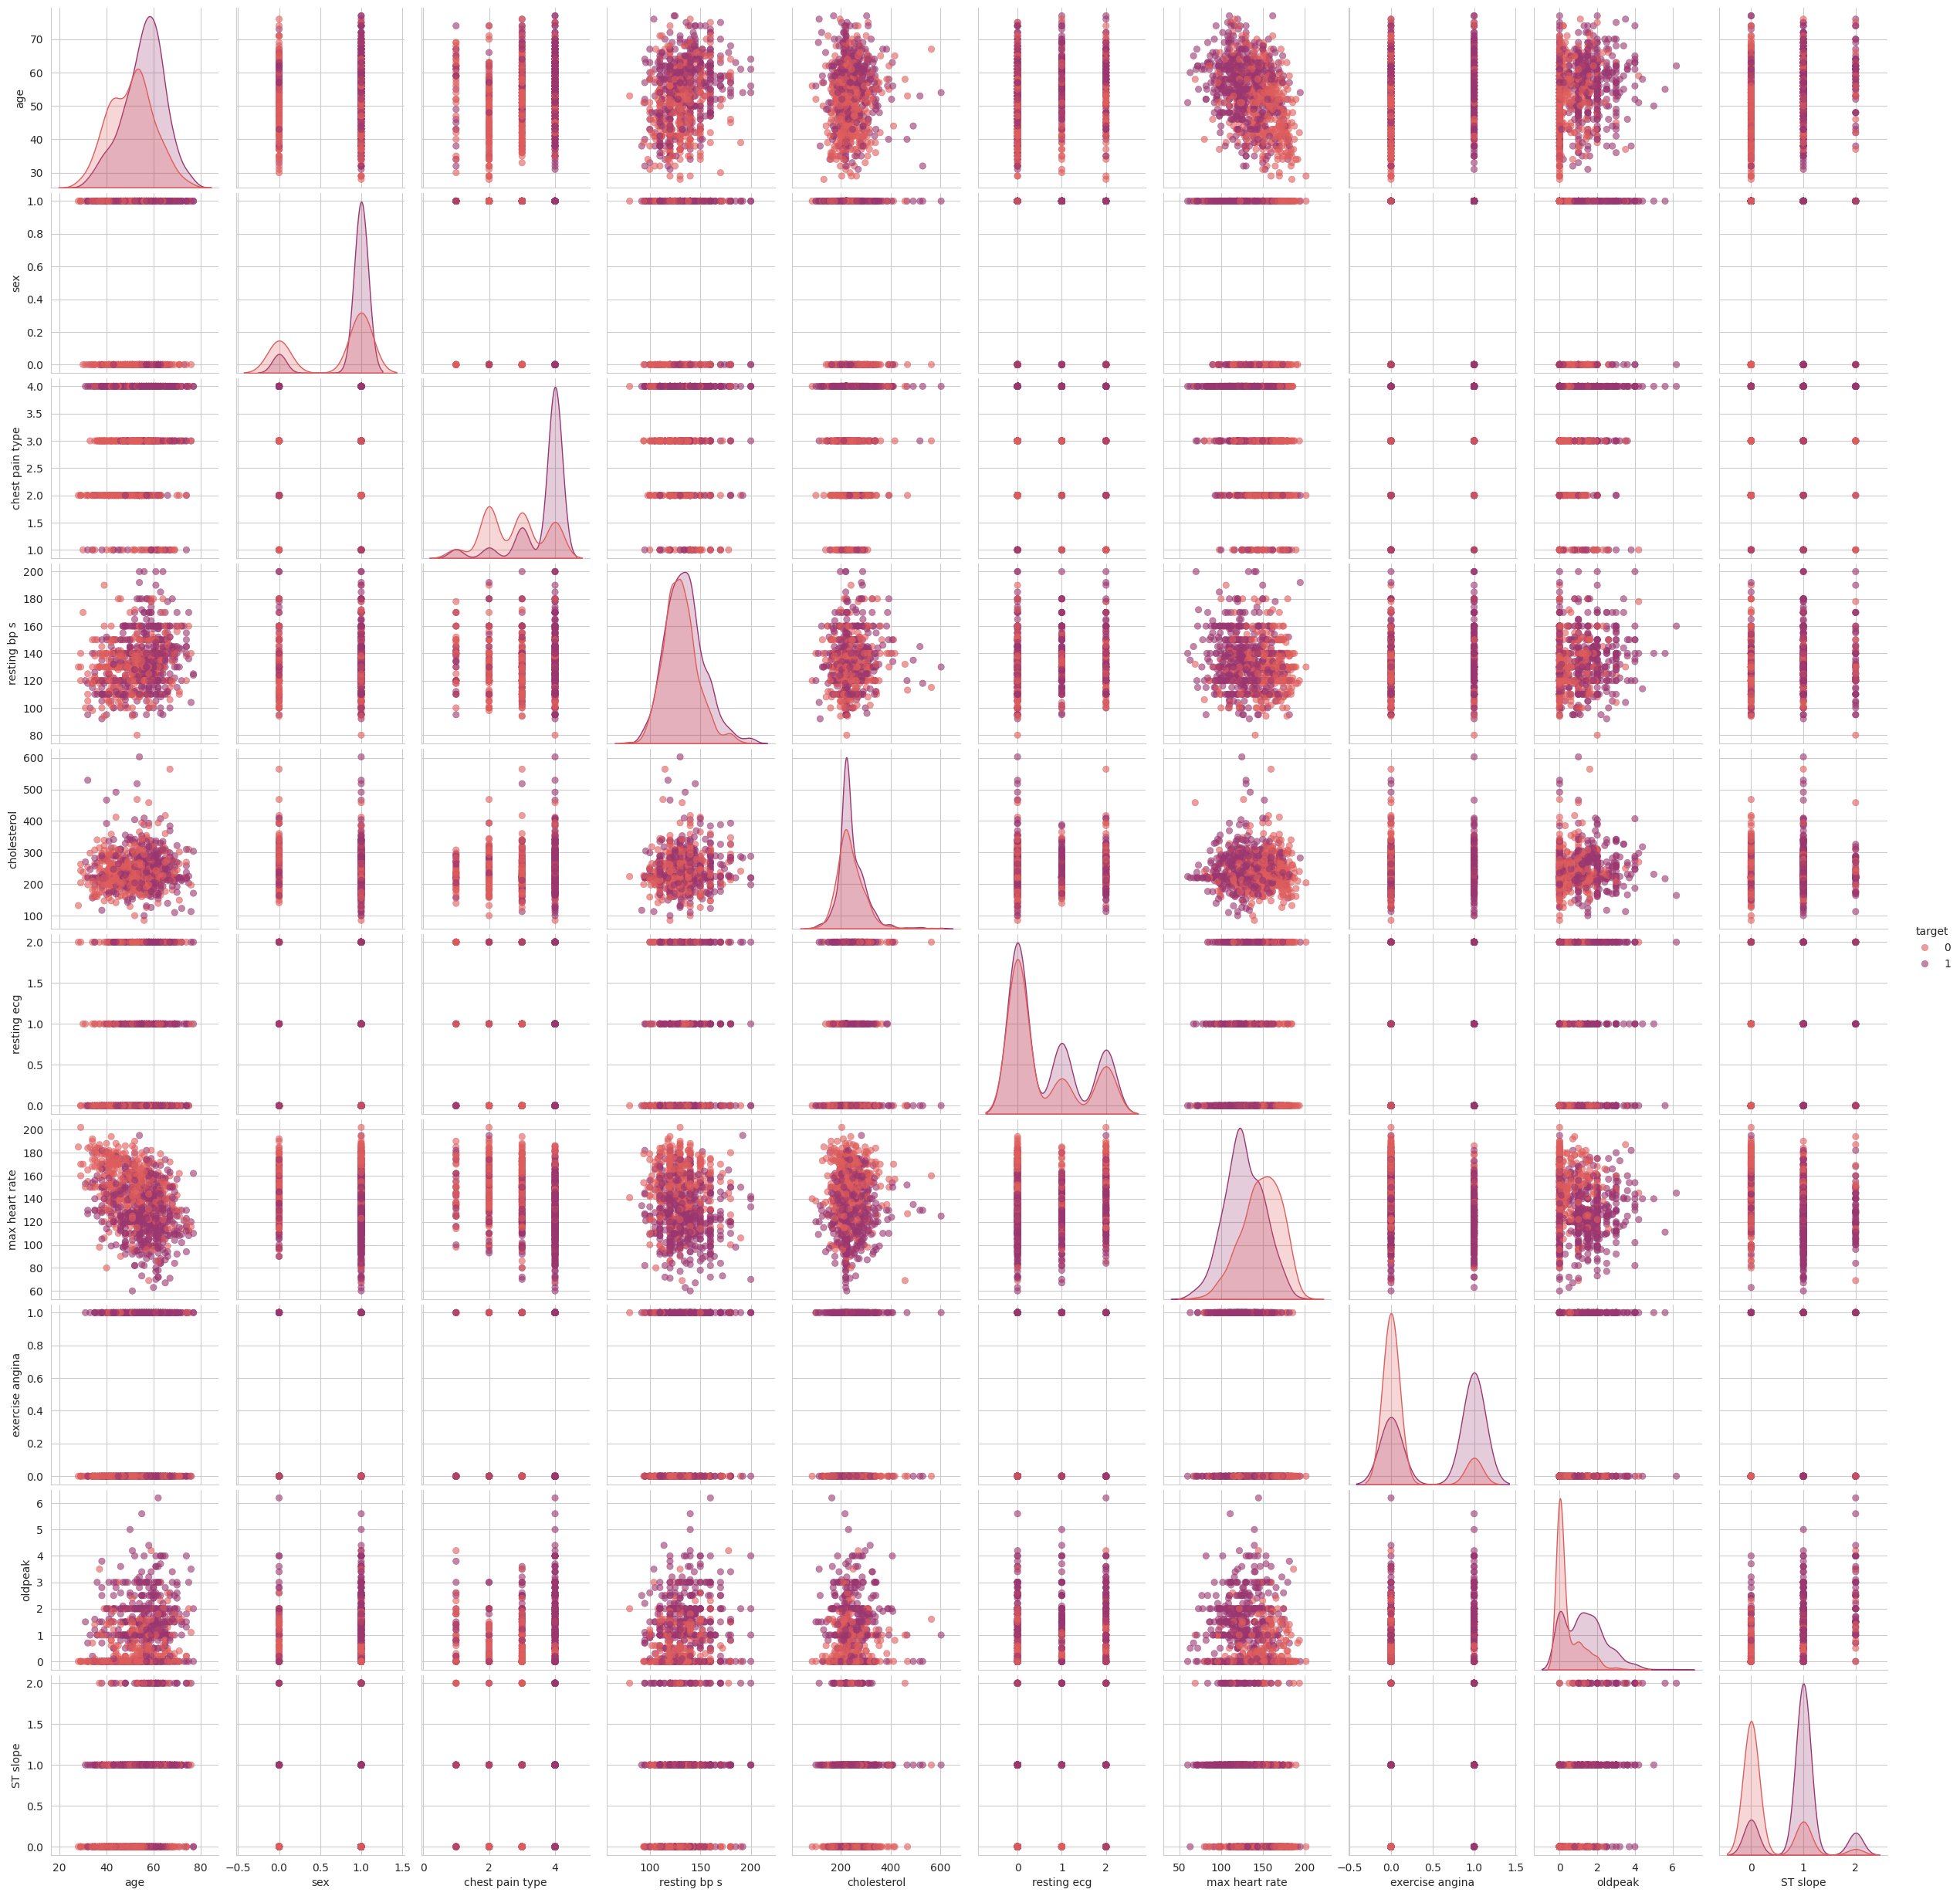

In [28]:
# Cria um pairplot para a visualização dos novos valores
sns.pairplot(m_df, diag_kind = 'kde',
             hue = 'target', palette = 'flare',
             plot_kws = dict(edgecolor = None, alpha = 0.6))

plt.show()             

Com uma visualização bem melhor organizada, cientes das correlações e menos outliers no conjunto, podemos partir, agora, para a transformação dos dados.

Alguns dos nosso valores são valores categóricos e precisam ser transformados em valores interpretáveis para o treinamento de modelos de aprendizado de máquina. Para isso, vamos transformar essas variáveis em "dummies" para a interpretação da máquina:

In [29]:
m_df = pd.get_dummies(m_df, drop_first = True)

m_df

age  sex  chest pain type  resting bp s  cholesterol  resting ecg  \
0     40    1                2           140          289            0   
1     49    0                3           160          180            0   
2     37    1                2           130          283            1   
3     48    0                4           138          214            0   
4     54    1                3           150          195            0   
..   ...  ...              ...           ...          ...          ...   
913   45    1                1           110          264            0   
914   68    1                4           144          193            0   
915   57    1                4           130          131            0   
916   57    0                2           130          236            2   
917   38    1                3           138          175            0   

     max heart rate  exercise angina  oldpeak  ST slope  target  
0               172                0      0.0         0       0  
1               156                0      1.0         1       1  
2                98                0      0.0         0       0  
3               108                1      1.5         1       1  
4               122                0      0.0         0       0  
..              ...              ...      ...       ...     ...  
913             132                0      1.2         1       1  
914             141                0      3.4         1       1  
915             115                1      1.2         1       1  
916             174                0      0.0         1       1  
917             173                0      0.0         0       0  

[916 rows x 11 columns]

E, por fim, encerraremos a etapa com uma matriz de correlação. O propósito da matriz é não apenas identificar possíveis valores ainda categóricos, mas também identificar quais variáveis possuem uma maior relação com a nossa variável-alvo (no caso, target):

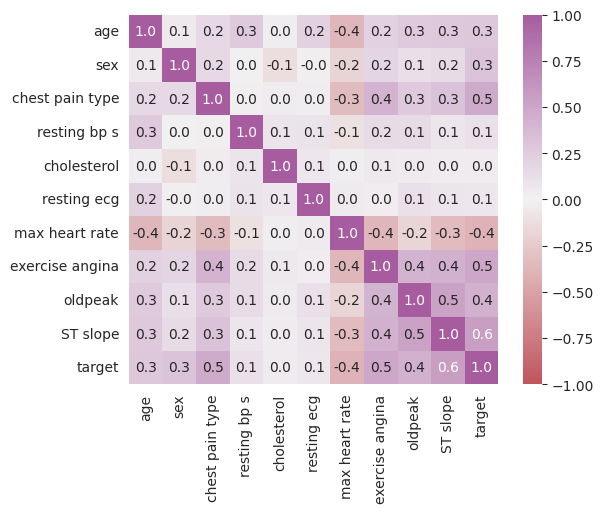

In [30]:
# Cria-se uma matriz de correlação
sns.heatmap(m_df.corr(), cmap = b_pal, annot = True,
           fmt = '.1f', square = True,
           vmax = 1, vmin = -1)

plt.show()

Podemos observar que todas as variáveis estão presentes na matriz, o que significa que os seus valores são quantificáveis. Além disso, podemos também notar que as variáveis com os maiores valores de correlação com a variável alvo são:
- *ST slope* (+0.6),
- *chest pain type* (+0.5),
- *exercise angina* (+0.5),
- *oldpeak* (+0.4);

Enquanto as variáveis com menor correlação com a variável alvo são:
- *max heart rate* (-0.4),
- *cholesterol* (+0.0)

Seguimos, agora, para o treinamento e comparação dos modelos de predição:

----
#### Treinamento e comparação de modelos:
Agora partimos para a parte ML da coisa: vamos verificar quais modelos melhor se aplicam ao nosso conjunto, quais retornam melhor acurácia na predição.

Mas vamos por partes! Primeiro, vamos dividir o nosso conjunto em dois conjuntos distintos: um para treino e um para testes.

In [31]:
# Importamos as bibliotecas usadas na criação do modelo:
from sklearn.model_selection import train_test_split

In [32]:
# Divide o conjunto em duas partes: um apenas com os alvos e um com as outras variáveis:
X = m_df.drop(['target'], axis = 1)
y = m_df['target']

# Realiza a divisão dos novos sets em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                   random_state = 7)

# Verifica a distribuição de valores entre os dois conjuntos:
print(f'Conjunto de treino:\n{X_train.shape}\n{y_train.shape}\nConjunto de testes:\n{X_test.shape}\n{y_test.shape}')

Conjunto de treino:
(732, 10)
(732,)
Conjunto de testes:
(184, 10)
(184,)


Agora que temos uma divisão de sets - um de treino e um de testes, com frames separados dos alvos, podemos prosseguir para a próxima etapa: o scaling e a escolha de modelo.

Para isso, precisamos saber qual modelo melhor se aplica ao nosso dataset, com boas pontuações de validação cruzada. Além disso, é interessante verificarmos qual dos scalers mais comuns (MinMax, Standard ou Robust)  melhor se adapta ao modelo escolhido.

In [33]:
# Importa uma biblioteca para validação cruzada
from sklearn.model_selection import cross_val_score

# Importa bibliotecas com alguns modelos para teste, tal como scalers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [34]:
# Define os modelos a testar
models = {
    'Logistic Regression': LogisticRegression(max_iter = 1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(eval_metric = 'logloss')
}

# Avalia com validação cruzada
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
    print(f'{name}: Média da acurácia = {scores.mean():.4f}')

Logistic Regression: Média da acurácia = 0.8188
Random Forest: Média da acurácia = 0.8296
SVM: Média da acurácia = 0.6780
XGBoost: Média da acurácia = 0.8122


É possível verificar que a maior média de acurácia dentre os modelos testados é a de Random Forest. Mas e quanto ao scaler? Qual seria o melhor para se usar nessa situação?

In [35]:
# Importa os módulos de scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Importa pipelines
from sklearn.pipeline import Pipeline

In [36]:
# Define os scalers
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Avalia com validação cruzada
for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', RandomForestClassifier())
    ])
    scores = cross_val_score(pipeline, X, y, cv=5)  # CV para validação cruzada
    print(f"{name}: Média da acurácia = {scores.mean():.4f}")

StandardScaler: Média da acurácia = 0.8340
MinMaxScaler: Média da acurácia = 0.8318
RobustScaler: Média da acurácia = 0.8351


De acordo com as duas avaliações cruzadas, o melhor modelo a se usar é o RandomForestClassifier e o melhor scaler para esse uso é o RobustScaler.

Prossigamos, portanto, com a criação de um modelo que utiliza essas configurações de pipeline:

In [37]:
# Cria uma pipeline com o RC para Random Forest
pipe_rf = Pipeline([('scaler', RobustScaler()), ('rf_classifier', RandomForestClassifier())])

# Dá fit no modelo acima:
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('rf_classifier', RandomForestClassifier())])

E, por fim, verifiquemos três métricas de precisão: o Coeficiente de Determinação (R²), o Erro Quadrático Médio (RMSE) e o Erro Quadrático Absoluto (MAE):

In [38]:
# Importa três métricas para teste de precisão:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [39]:
# Utiliza nossa pipeline para fazer uma predição, aplicando as métricas em seguida:
y_pred = pipe_rf.predict(X_test) # - Cria a previsão

# Cria um dicionário para inserir as métricas que vão ser usadas
metrics = {}

# Aplica as métricas ao modelo
metrics['Random Forest'] = {
    'R²': r2_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    }

# Exibe os resultados das predições finais:
for model, scores in metrics.items():
    print(f'{model}:')
    for metric, value in scores.items():
        print(f'{metric}: {value:.2f}')

Random Forest:
R²: 0.30
RMSE: 0.42
MAE: 0.17


### Considerações finais
Ao longo da criação dos notebooks de análise de conjunto e comparação de modelos, pudemos aprender uma série de informações relevantes sobre a criação de modelos de aprendizado de máquina tal como curiosidades médicas.

Similar ao que as análises indicavam originalmente, algums das variáveis que mais parecem estar relacionadas à casos de cardiopatia são depressão ST, tipos de dor no peito e anginas em exercício - fatores que parecem fazer sentido.

A única variável que surpreendeu na análise e no treinamento foi o colesterol, que indicou não possuir tanta correlação com as cardiopatias - provavelmente devido ao tratamento de substituição usado nas inúmeras instâncias com a variável zerada. Uma análise aprofundada é requerida para retificar ou corroborar a hipótese de que o colesterol não interfere no risco de cardiopatia.